## The time

In [1]:
from pytz import timezone
from datetime import datetime, timedelta
import pytz

In [2]:
file_name = "1541962108935000000_167_838.h5"

In [3]:
ts = float(file_name.split("_")[0][:19])/10**9
UTC = datetime.utcfromtimestamp(ts)
print("UTC time: ", UTC)
CERN = pytz.timezone('CET')
CERN_time = CERN.localize(datetime.utcfromtimestamp(ts))
print("CERN local time: ", CERN_time)

UTC time:  2018-11-11 18:48:28.935000
CERN local time:  2018-11-11 18:48:28.935000+01:00


## The file

In [4]:
import h5py
import pandas as pd

In [5]:
file = h5py.File("data/"+file_name, 'r')

#### Program to create a csv file which records the names of all of the groups and datasets, and includes the size, shape and type of data in each dataset.

In [6]:
def program_dataframe(file):
    data = {}
    def checksome(branch, obj):
        #is it a Dataset or Group?
        if isinstance(obj, h5py.Dataset):
            try:
                data_type = obj.dtype
            except Exception as e:
                #typeBitField exception
                data_type = str(e)
            data[branch] = ['Dataset', obj.size, obj.shape, data_type]
        else:
            data[branch] = ['Group', None, None, None]
    file.visititems(checksome)
    df = pd.DataFrame.from_dict(data,orient='index',columns=['Identifier','Size','Shape','Data_type'])
    df.to_csv('data.csv', sep = ',')
    print("csv file generated.")
    return df

In [7]:
df = program_dataframe(file)
df.head()

csv file generated.


,Identifier,Size,Shape,Data_type
AwakeEventData,Group,NaN,None,None
AwakeEventData/AIRTR01,Group,NaN,None,None
AwakeEventData/AIRTR01/Acq,Group,NaN,None,None
AwakeEventData/AIRTR01/Acq/numericPosition,Dataset,1.0,"(1,)",float32
AwakeEventData/AIRTR02,Group,NaN,None,None


## The image

In [8]:
import numpy as np
from scipy.signal import medfilt
import matplotlib.pyplot as plt
%matplotlib inline

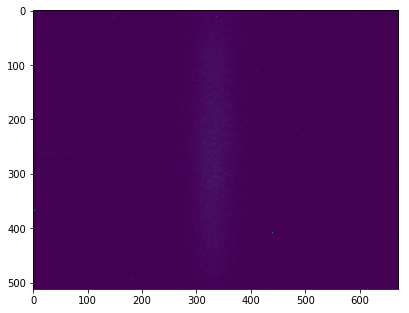

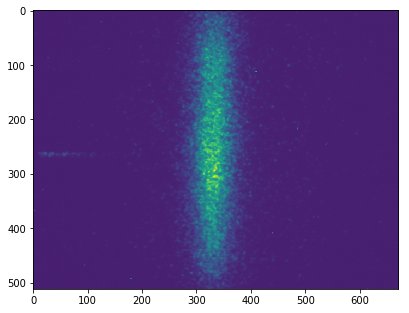

In [9]:
image_data = file['/AwakeEventData/XMPP-STREAK/StreakImage/streakImageData'][:]
image_h = file['/AwakeEventData/XMPP-STREAK/StreakImage/streakImageHeight'][0]
image_w = file['/AwakeEventData/XMPP-STREAK/StreakImage/streakImageWidth'][0]
image = np.reshape(image_data,(image_h,image_w))
filtered_image = medfilt(image)

fig = plt.figure(figsize=(image_w/100,image_h/100))
plt.imshow(image)
fig = plt.figure(figsize=(image_w/100,image_h/100))
plt.imshow(filtered_image)
plt.savefig("image.png")